# **ANALISI COVID**

## **Importo le librerie di cui avrò bisogno per l'analisi.** 

In [3]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('owid-covid-data CSV.csv')

## **EDA**

In [6]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [8]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,835.514313,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,1134.932671,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,24.568000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,295.089000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,1283.817000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000


In [9]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [10]:
#Analisi dettagliata delle colonne categoriche
print("Analisi delle colonne categoriche:")

#Inizializzo il contatore per le colonne categoriche
colonne_categoriche = 0

#Itero ogni colonna del DataFrame
for colonna in df.columns:
    # Verifico se la colonna è di tipo categorico
    if df[colonna].dtype == 'object':
        # Incremento il contatore
        colonne_categoriche += 1
        print(f"\nLa colonna '{colonna}' contiene dati categorici.")

        # Conto i valori unici presenti nella colonna
        valori_unici = df[colonna].nunique()  # Correzione: era scritto "column" invece di "colonna"
        print(f"- Contiene {valori_unici} valori unici.")

        # Verifico la frequenza di ogni valore unico
        conteggio_valori = df[colonna].value_counts().to_frame()
        print("- Frequenza di ogni valore unico:")  # Correzione di "qalore" in "valore"
        display(conteggio_valori)

#Visualizzo il conteggio totale delle colonne categoriche
print(f"\nTotale delle colonne categoriche: {colonne_categoriche}")

Analisi delle colonne categoriche:

La colonna 'iso_code' contiene dati categorici.
- Contiene 255 valori unici.
- Frequenza di ogni valore unico:


,count
iso_code,
OWID_HIC,3026
OWID_EUN,3024
OWID_UMC,3013
OWID_LMC,2983
OWID_LIC,2724
...,...
OWID_SCT,1305
OWID_WLS,1198
MAC,795



La colonna 'continent' contiene dati categorici.
- Contiene 6 valori unici.
- Frequenza di ogni valore unico:


,count
continent,
Africa,95419
Europe,91031
Asia,84199
North America,68638
Oceania,40183
South America,23440



La colonna 'location' contiene dati categorici.
- Contiene 255 valori unici.
- Frequenza di ogni valore unico:


,count
location,
High-income countries,3026
European Union (27),3024
Upper-middle-income countries,3013
Lower-middle-income countries,2983
Low-income countries,2724
...,...
Scotland,1305
Wales,1198
Macao,795



La colonna 'date' contiene dati categorici.
- Contiene 1688 valori unici.
- Frequenza di ogni valore unico:


,count
date,
2022-01-10,261
2021-03-12,261
2021-03-14,261
2021-03-15,261
2021-03-16,261
...,...
2024-08-14,8
2020-01-04,3
2020-01-02,2



La colonna 'tests_units' contiene dati categorici.
- Contiene 4 valori unici.
- Frequenza di ogni valore unico:


,count
tests_units,
tests performed,80099
people tested,16257
samples tested,9591
units unclear,841



Totale delle colonne categoriche: 5


In [11]:
df.isnull().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [12]:
#Analisi dei valori nulli: visualizza solo colonne con valori NaN
print("Colonne con valori nulli e relativa percentuale:")

#Inizializzo un contatore per le colonne con valori nulli
valori_nulli = 0

#Itero ogni colonna del DataFrame
for colonna in df.columns:
    # Conto i valori nulli nella colonna
    conto_nulli = df[colonna].isna().sum()

    # Controllo se la colonna ha valori nulli
    if conto_nulli > 0:
        # Incremento il contatore
        valori_nulli += 1

        # Calcolo percentuale di valori nulli
        percentuali_nulli = round((conto_nulli / df.shape[0]) * 100, 2)  # Correzione della formula

        # Visualizzo solo colonne con valori nulli
        print(f"La colonna '{colonna}' contiene {conto_nulli} valori NaN, pari al {percentuali_nulli}% del totale.")

#Visualizzo il conteggio totale delle colonne con valori nulli
print(f"\nTotale delle colonne con valori nulli: {valori_nulli}")

Colonne con valori nulli e relativa percentuale:
La colonna 'continent' contiene 26525 valori NaN, pari al 6.18% del totale.
La colonna 'total_cases' contiene 17631 valori NaN, pari al 4.11% del totale.
La colonna 'new_cases' contiene 19276 valori NaN, pari al 4.49% del totale.
La colonna 'new_cases_smoothed' contiene 20506 valori NaN, pari al 4.78% del totale.
La colonna 'total_deaths' contiene 17631 valori NaN, pari al 4.11% del totale.
La colonna 'new_deaths' contiene 18827 valori NaN, pari al 4.38% del totale.
La colonna 'new_deaths_smoothed' contiene 20057 valori NaN, pari al 4.67% del totale.
La colonna 'total_cases_per_million' contiene 17631 valori NaN, pari al 4.11% del totale.
La colonna 'new_cases_per_million' contiene 19276 valori NaN, pari al 4.49% del totale.
La colonna 'new_cases_smoothed_per_million' contiene 20506 valori NaN, pari al 4.78% del totale.
La colonna 'total_deaths_per_million' contiene 17631 valori NaN, pari al 4.11% del totale.
La colonna 'new_deaths_per_m

## **ANALISI**

### **2.a.**

In [15]:
#2.a. Numero di casi fin dall'inizio della pandemia per ogni continente

casi_per_continente = df.groupby('continent')['new_cases'].sum()
print(f'I casi per continente sono:{casi_per_continente}')
casi_totali = casi_per_continente.sum()
print(f"I casi totali sono:{casi_totali}")

I casi per continente sono:continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: new_cases, dtype: float64
I casi totali sono:775935057.0


In [16]:
#provo a fare una verifica su l'ultimo valore dei total_cases
df_ultimi_valori = df[df['total_cases'].notna()].groupby('location').tail(1)
df_raggruppato = df_ultimi_valori.groupby('continent')['total_cases'].sum()

print(df_raggruppato)

continent
Africa            13145380.0
Asia             301499099.0
Europe           252916868.0
North America    124492666.0
Oceania           15003352.0
South America     68809418.0
Name: total_cases, dtype: float64


In [17]:
# da questa verica mi accorgo di una discrepanza nei totali ma, leggendo le info su github del dataset
# originale, mi rendo conto che la differenza potrebbe essere dettata dai NaN presenti in new_cases poichè 
# in alcuni giorni si è dovuta aggiornare negativamente la colonna ed è stato preferito inserire un valore NaN
# rispetto ad un numero negativo che avrebbe compromesso eventuali calcoli matematici su di esso.
# la differenza è molto esigua in percentuale quindi continuo con l'analisi.
df_verifica = casi_per_continente - df_raggruppato
df_verifica

continent
Africa            1451.0
Asia             65081.0
Europe               0.0
North America       32.0
Oceania            116.0
South America     1594.0
dtype: float64

### **2.b.**

In [19]:
#2.b. numero di casi in percentuali diviso per paesi
percentuale = round((casi_per_continente/casi_per_continente.sum()) * 100,2)
print(f'Percentuale dei casi divsi per {percentuale}')

Percentuale dei casi divsi per continent
Africa            1.69
Asia             38.86
Europe           32.60
North America    16.04
Oceania           1.93
South America     8.87
Name: new_cases, dtype: float64


### **3.**

In [21]:
#3. selezionare i dati relativi al 2022 (siccome il Dtype di 'data' è object lo cambio con Dtype data)
df['date'] = pd.to_datetime(df['date'])
df['date'].info() #controllo se è avvenuta la modifica

<class 'pandas.core.series.Series'>
RangeIndex: 429435 entries, 0 to 429434
Series name: date
Non-Null Count   Dtype         
--------------   -----         
429435 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.3 MB


In [22]:
#pulisco i dati togliendo i valori nulli dalla colonna 'new_cases'
df_notnull = df.dropna(subset=['new_cases'])
df_notnull

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [23]:
#siccome nella colonna new_cases i valori si incrementano di settimana in settimana, elimino gli 0.0
#mantenendo solo i valori incrementati.
df_notzero = df_notnull[df_notnull['new_cases'] !=0]
df_notzero

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
56,AFG,Asia,Afghanistan,2020-03-01,1.0,1.0,0.143,0.0,0.0,0.000,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
70,AFG,Asia,Afghanistan,2020-03-15,7.0,6.0,0.857,0.0,0.0,0.000,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
77,AFG,Asia,Afghanistan,2020-03-22,24.0,17.0,2.429,0.0,0.0,0.000,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
84,AFG,Asia,Afghanistan,2020-03-29,91.0,67.0,9.571,2.0,2.0,0.286,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
91,AFG,Asia,Afghanistan,2020-04-05,274.0,183.0,26.143,5.0,3.0,0.429,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429385,ZWE,Africa,Zimbabwe,2024-06-16,266374.0,9.0,1.286,5740.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429392,ZWE,Africa,Zimbabwe,2024-06-23,266378.0,4.0,0.571,5740.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429399,ZWE,Africa,Zimbabwe,2024-06-30,266384.0,6.0,0.857,5740.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429406,ZWE,Africa,Zimbabwe,2024-07-07,266385.0,1.0,0.143,5740.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [24]:
df_italia22 = df_notzero [(df_notzero['location'] == 'Italy') & (df_notzero['date'].dt.year == 2022)]
df_italia22

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,168226.30,12.99,8.06,2849.4834
186010,ITA,Europe,Italy,2022-01-09,7281297.0,1014262.0,144894.571,138881.0,1368.0,195.429,...,27.8,NaN,3.18,83.51,0.892,59037472,168831.80,12.89,3.94,2859.7395
186017,ITA,Europe,Italy,2022-01-16,8549450.0,1268153.0,181164.714,140856.0,1975.0,282.143,...,27.8,NaN,3.18,83.51,0.892,59037472,170089.10,12.83,8.03,2881.0361
186024,ITA,Europe,Italy,2022-01-23,9781191.0,1231741.0,175963.000,143296.0,2440.0,348.571,...,27.8,NaN,3.18,83.51,0.892,59037472,171694.19,12.80,10.40,2908.2239
186031,ITA,Europe,Italy,2022-01-30,10821375.0,1040184.0,148597.714,145914.0,2618.0,374.000,...,27.8,NaN,3.18,83.51,0.892,59037472,174151.69,12.84,16.50,2949.8500
186038,ITA,Europe,Italy,2022-02-06,11542793.0,721418.0,103059.714,148542.0,2628.0,375.429,...,27.8,NaN,3.18,83.51,0.892,59037472,176219.19,12.85,13.98,2984.8700
186045,ITA,Europe,Italy,2022-02-13,12053330.0,510537.0,72933.857,150824.0,2282.0,326.000,...,27.8,NaN,3.18,83.51,0.892,59037472,177489.48,12.81,8.88,3006.3870
186052,ITA,Europe,Italy,2022-02-20,12427773.0,374443.0,53491.857,152848.0,2024.0,289.143,...,27.8,NaN,3.18,83.51,0.892,59037472,178007.39,12.72,3.66,3015.1594
186059,ITA,Europe,Italy,2022-02-27,12732680.0,304907.0,43558.143,154416.0,1568.0,224.000,...,27.8,NaN,3.18,83.51,0.892,59037472,178015.30,12.60,0.06,3015.2935
186066,ITA,Europe,Italy,2022-03-06,12990223.0,257543.0,36791.857,155782.0,1366.0,195.143,...,27.8,NaN,3.18,83.51,0.892,59037472,178133.80,12.48,0.86,3017.3005


### **3.a.**

<Axes: xlabel='date', ylabel='total_cases'>

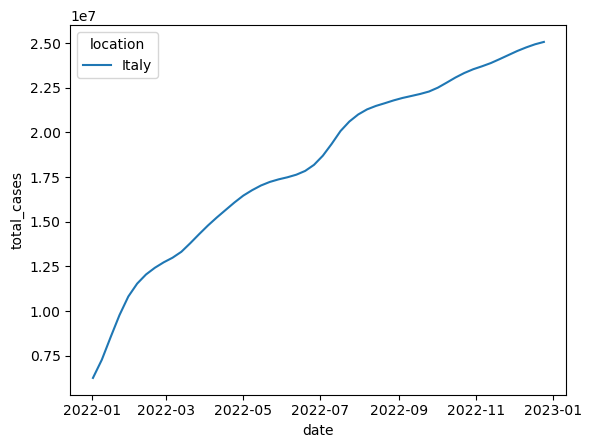

In [26]:
#3.a. grafico dell'evoluzione dei casi totali dall'inizio alla fine dell'anno
sns.lineplot(data = df_italia22, x = 'date', y = 'total_cases', hue = 'location')

### **3.b.**

<Axes: xlabel='date', ylabel='new_cases'>

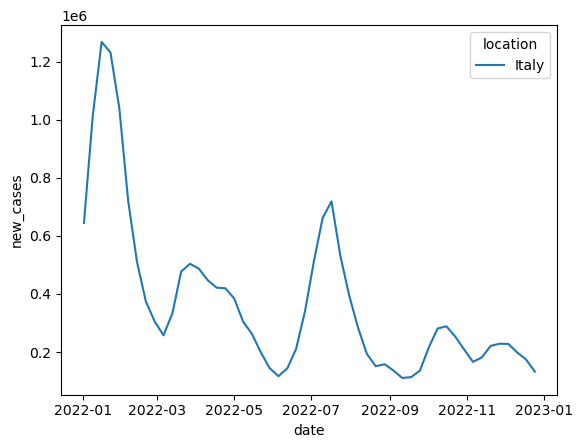

In [28]:
#3.b. numero dei nuovi casi rispetto alla data
sns.lineplot(data = df_italia22, x = 'date', y = 'new_cases', hue = 'location')

### **4.**

In [30]:
# creo le variabili che mi serviranno per il grafico pulendo il dataset
df_ita_ger_fra = df_notzero[(df_notzero['location'] == 'Italy') | (df_notzero['location'] =='Germany') | (df_notzero['location'] == 'France')]
df_ita_ger_fra

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
130388,FRA,Europe,France,2020-01-26,3.0,3.0,0.429,0.0,0.0,0.000,...,35.6,NaN,5.98,82.66,0.901,67813000,-3599.600,-6.61,-7.74,-55.825020
130395,FRA,Europe,France,2020-02-02,6.0,3.0,0.429,0.0,0.0,0.000,...,35.6,NaN,5.98,82.66,0.901,67813000,-4424.000,-6.52,-6.17,-68.610370
130402,FRA,Europe,France,2020-02-09,12.0,6.0,0.857,0.0,0.0,0.000,...,35.6,NaN,5.98,82.66,0.901,67813000,-5500.800,-6.76,-7.99,-85.310104
130416,FRA,Europe,France,2020-02-23,16.0,4.0,0.571,0.0,0.0,0.000,...,35.6,NaN,5.98,82.66,0.901,67813000,-7910.200,-7.34,-10.25,-122.676704
130500,FRA,Europe,France,2020-05-17,693.0,677.0,96.714,17430.0,810.0,115.714,...,35.6,NaN,5.98,82.66,0.901,67813000,15632.999,6.28,-0.67,242.447070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186920,ITA,Europe,Italy,2024-07-07,26739617.0,4660.0,665.714,197188.0,29.0,4.143,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186927,ITA,Europe,Italy,2024-07-14,26747536.0,7919.0,1131.286,197226.0,38.0,5.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186934,ITA,Europe,Italy,2024-07-21,26759053.0,11517.0,1645.286,197267.0,41.0,5.857,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186941,ITA,Europe,Italy,2024-07-28,26774728.0,15675.0,2239.286,197301.0,34.0,4.857,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN


In [31]:
df_icu = df_ita_ger_fra[(df_ita_ger_fra['date'] >= '2022-05-01') & (df_ita_ger_fra['date'] <= '2023-04-30')]
df_icu

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
131214,FRA,Europe,France,2022-05-01,27742592.0,376510.0,53787.143,146744.0,867.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000,89536.720,6.19,6.24,1385.4463
131221,FRA,Europe,France,2022-05-08,28007520.0,264928.0,37846.857,147493.0,749.0,107.000,...,35.6,NaN,5.98,82.66,0.901,67813000,90322.420,6.20,6.97,1397.6039
131228,FRA,Europe,France,2022-05-15,28224235.0,216715.0,30959.286,148107.0,614.0,87.714,...,35.6,NaN,5.98,82.66,0.901,67813000,90725.920,6.18,3.63,1403.8474
131235,FRA,Europe,France,2022-05-22,28386474.0,162239.0,23177.000,148573.0,466.0,66.571,...,35.6,NaN,5.98,82.66,0.901,67813000,90998.420,6.15,2.47,1408.0640
131242,FRA,Europe,France,2022-05-29,28499829.0,113355.0,16193.571,148873.0,300.0,42.857,...,35.6,NaN,5.98,82.66,0.901,67813000,90363.125,6.07,-5.76,1398.2338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186458,ITA,Europe,Italy,2023-04-02,25701147.0,20999.0,2999.857,189155.0,181.0,25.857,...,27.8,NaN,3.18,83.51,0.892,59037472,240299.300,11.35,-2.91,4081.8103
186465,ITA,Europe,Italy,2023-04-09,25721054.0,19907.0,2843.857,189303.0,148.0,21.143,...,27.8,NaN,3.18,83.51,0.892,59037472,240183.300,11.27,-0.94,4079.8400
186472,ITA,Europe,Italy,2023-04-16,25745800.0,24746.0,3535.143,189440.0,137.0,19.571,...,27.8,NaN,3.18,83.51,0.892,59037472,240772.300,11.24,4.87,4089.8450
186479,ITA,Europe,Italy,2023-04-23,25772459.0,26659.0,3808.429,189627.0,187.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472,241500.700,11.21,6.12,4102.2180


### **4.a.**

<Axes: xlabel='location', ylabel='icu_patients'>

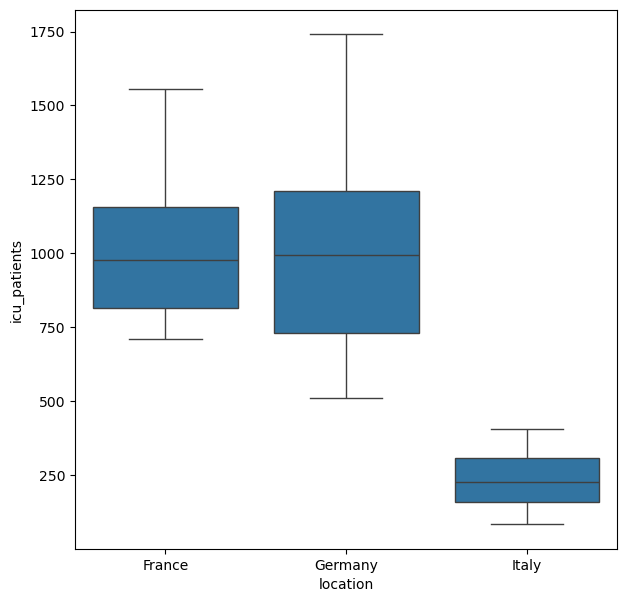

In [33]:
# grafico che mette in correlazione Italia, Francia e Germania rispetto ai pazienti in
# terapia intensiva
plt.figure(figsize=[7,7])
sns.boxplot(data = df_icu, x = 'location', y = 'icu_patients')

### **4.b.**

In [35]:
testo = """Dal grafico risultante, nel periodo preso in oggetto,
in Francia e Germania i pazienti in terapia intensiva 
sono molti di più rispetto all'Italia; questo potrebbe 
significare una maggiore attenzione preventiva nei 
confronti del virus da parte dell'Italia."""
print(testo)

Dal grafico risultante, nel periodo preso in oggetto,
in Francia e Germania i pazienti in terapia intensiva 
sono molti di più rispetto all'Italia; questo potrebbe 
significare una maggiore attenzione preventiva nei 
confronti del virus da parte dell'Italia.


### **5.a.**

In [37]:
df_notzero['date'] = pd.to_datetime(df['date'])
osp_21 = df_notzero.loc[(df_notzero['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & 
(df_notzero['date'].dt.year == 2021)]
osp_sum = osp_21.groupby('location')['hosp_patients'].sum()
print(f'Somma dei pazienti ospitalizzati nel 2021:')
osp_sum

Somma dei pazienti ospitalizzati nel 2021:


C:\Users\ferro\AppData\Local\Temp\ipykernel_11680\639374078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notzero['date'] = pd.to_datetime(df['date'])


location
France     854767.0
Germany         0.0
Italy      626339.0
Spain      357643.0
Name: hosp_patients, dtype: float64

<Axes: xlabel='hosp_patients', ylabel='date'>

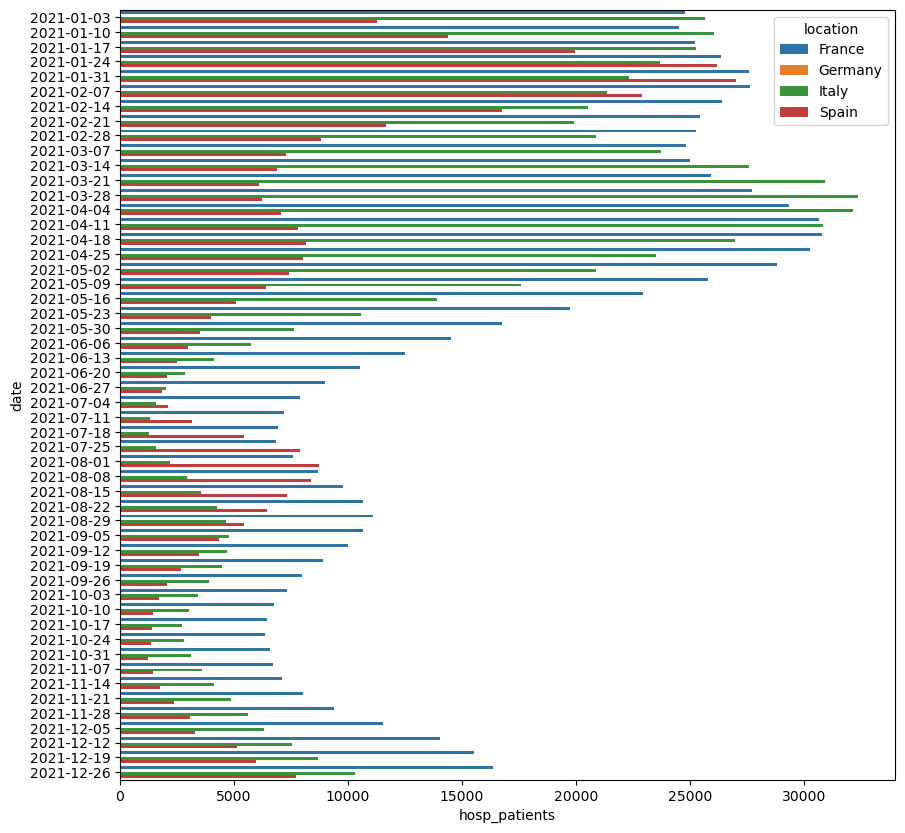

In [38]:
# ho prodotto anche un grafico oltre ai dati numerici
plt.figure(figsize=[10,10])
sns.barplot(data = osp_21, x = 'hosp_patients', y = 'date', hue = 'location')

### **5.b.**

In [82]:
commento = '''Sono presenti dati nulli, soprattutto per la Germania, e potrebbero, nel caso della Germania appunto, essere sostutuiti 
con un valore 0.0, ma preferisco comunque non farlo poichè per eventuali operazioni che mi potrebbe servire di fare successivamente 
a queste potrebbe falsare i risultati (ad esempio una media tra questi 4 paesi).'''
print(commento)

Sono presenti dati nulli, soprattutto per la Germania, e potrebbero, nel caso della Germania appunto, essere sostutuiti 
con un valore 0.0, ma preferisco comunque non farlo poichè per eventuali operazioni che mi potrebbe servire di fare successivamente 
a queste potrebbe falsare i risultati (ad esempio una media tra questi 4 paesi).
